In [1]:
import pandas as pd
import numpy as np
import os,glob

In [2]:
path ="/home/sigma_wd/TIANCHI/Round_2/R2_TESTB_R2/"
file = glob.glob(os.path.join(path,'*.csv'))
print(file)

['/home/sigma_wd/TIANCHI/Round_2/R2_TESTB_R2/vote_R2_testb_R1.csv', '/home/sigma_wd/TIANCHI/Round_2/R2_TESTB_R2/R2_predb_double_optionB_Res50_epoch45_fold3_0212.csv', '/home/sigma_wd/TIANCHI/Round_2/R2_TESTB_R2/R2_predb_single_optionB_Res50_epoch60_fold3_0213_dehaze_yous1.csv', '/home/sigma_wd/TIANCHI/Round_2/R2_TESTB_R2/R2_predb_LSClass_single_optionB_Res50_0212_soft_straight_dehaze_nos1.csv', '/home/sigma_wd/TIANCHI/Round_2/R2_TESTB_R2/R2_predb_single_optionB_Res50_epoch175_fold1_0212.csv', '/home/sigma_wd/TIANCHI/Round_2/R2_TESTB_R2/R2_predb_single_optionB_Res50_epoch75_fold3_0212_dehaze_nos1.csv', '/home/sigma_wd/TIANCHI/Round_2/R2_TESTB_R2/R2_predb_single_optionB_Res50_epoch39_fold2_0213_dehaze_yous1.csv', '/home/sigma_wd/TIANCHI/Round_2/R2_TESTB_R2/R2_predb_single_optionB_Res50_epoch70_fold2_0212_dehaze_nos1.csv', '/home/sigma_wd/TIANCHI/Round_2/R2_TESTB_R2/R2_predb_single_optionB_Res50_epoch66_fold5_0213_dehaze_yous1.csv', '/home/sigma_wd/TIANCHI/Round_2/R2_TESTB_R2/R2_predb_sin

In [3]:
len(file)

21

In [4]:
all=[]
for f in file:
    a = np.asarray(pd.read_csv(f,header=None))
    l = np.argmax(a,axis=1)
    all.append(l)

In [5]:
allnp = np.array(all)

In [6]:
allnp

array([[ 8,  8,  5, ...,  7,  2,  7],
       [ 5,  8,  5, ..., 14,  2,  7],
       [ 8,  8,  5, ...,  7,  2,  7],
       ...,
       [ 8, 13,  5, ..., 14,  4,  7],
       [ 8,  8,  5, ...,  7,  2,  7],
       [ 8,  8,  5, ...,  9,  2,  7]])

In [7]:
allnpT=allnp.T
#vote = np.argmax(np.bincount(allnp,axis=1))
# voten = np.bincount(allnp)
allnpT.shape

(4835, 21)

In [8]:
allnpT

array([[ 8,  5,  8, ...,  8,  8,  8],
       [ 8,  8,  8, ..., 13,  8,  8],
       [ 5,  5,  5, ...,  5,  5,  5],
       ...,
       [ 7, 14,  7, ..., 14,  7,  9],
       [ 2,  2,  2, ...,  4,  2,  2],
       [ 7,  7,  7, ...,  7,  7,  7]])

In [9]:
labels =[]
for j in range(allnpT.shape[0]): 
    labels.append(np.argmax(np.bincount(allnpT[j])))

In [10]:
def write_csv(results,file_name):
    import csv
    with open(file_name,'w') as f:
        writer = csv.writer(f)
        writer.writerows(results)#注意读写

In [11]:
import torch
label=torch.from_numpy(np.array(labels)[:,np.newaxis]).long()
print(label.shape)
result=torch.zeros(len(labels), 17).scatter_(1, label, 1)
write_csv(result.numpy().astype(int),'vote_R2_testb_R2.csv')

torch.Size([4835, 1])


In [12]:
result

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [3]:
#投票完成，后面为看数据

In [13]:
res95 = pd.read_csv('vote_R2_testb_R2.csv',header=None)
res95np = res95.values
labels95 = np.argmax(res95np,axis=1)
b=np.array(labels)
b

array([8, 8, 5, ..., 7, 2, 7])

In [14]:
c = labels95[:30,np.newaxis]
d= b[:30,np.newaxis]
a = np.concatenate((c,d),axis=1)
a

array([[ 8,  8],
       [ 8,  8],
       [ 5,  5],
       [ 0,  0],
       [13, 13],
       [15, 15],
       [ 7,  7],
       [ 5,  5],
       [ 9,  9],
       [ 2,  2],
       [ 3,  3],
       [16, 16],
       [10, 10],
       [16, 16],
       [ 3,  3],
       [10, 10],
       [ 7,  7],
       [10, 10],
       [ 7,  7],
       [ 7,  7],
       [ 2,  2],
       [ 2,  2],
       [14, 14],
       [ 0,  0],
       [13, 13],
       [16, 16],
       [ 2,  2],
       [ 7,  7],
       [16, 16],
       [16, 16]])

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
num= np.bincount(labels)
x = [i for i in range(17)]

([<matplotlib.axis.XTick at 0x7f219ea1cfd0>,
 <a list of 17 Text xticklabel objects>)

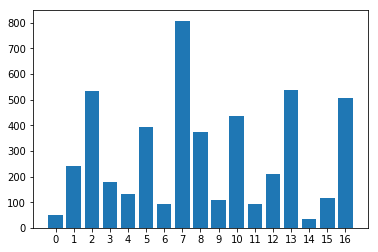

In [17]:
plt.bar(x,num)
plt.xticks(x)

In [18]:
len(labels)

4835